In [15]:
!!pip install keras pydot graphviz
!pip install tensorflow

# Import the libraries


In [16]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout # Import BatchNormalization and Dropout from tensorflow.keras.layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import tensorflow as tf # import tensorflow to access keras
from tensorflow import keras # import keras
# Removed redundant imports
#from keras.layers import Dropout
#from keras.layers.normalization import BatchNormalization

# Load MINST data:

In [18]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

# first 12 images

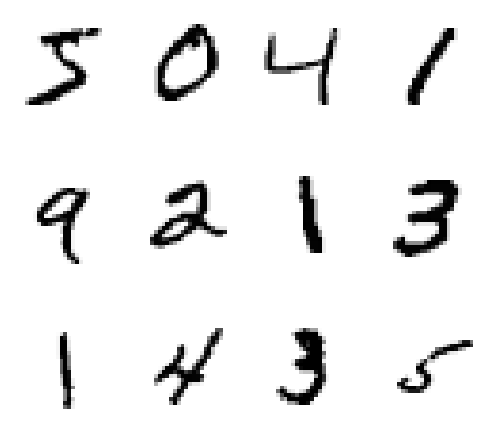

In [19]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()


# Flattening 2 dimensional images to one dimensional:

In [20]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')


# Converting pixel integer values [0-255] to float values [0-1]

In [21]:
X_train /= 255
X_valid /= 255


In [22]:
print(X_train.shape)
print(X_valid.shape)

(60000, 784)
(10000, 784)


# Converting training and validation labels from integer values to one-hot encoding

In [23]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)


In [14]:
print(y_train.shape)
print(y_valid.shape)

(60000,)
(10000,)


# Designing your first neural network architecture!

In [24]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# structure of your network

In [26]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
#you can see a summary of the model using:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,978 (234.29 KB)

 Trainable params: 59,594 (232.79 KB)

 Non-trainable params: 384 (1.50 KB)

In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_valid, y_valid))


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7776 - loss: 0.7153 - val_accuracy: 0.9533 - val_loss: 0.1578
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9514 - loss: 0.1608 - val_accuracy: 0.9617 - val_loss: 0.1272
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9644 - loss: 0.1167 - val_accuracy: 0.9661 - val_loss: 0.1055
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9729 - loss: 0.0897 - val_accuracy: 0.9694 - val_loss: 0.0957
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9776 - loss: 0.0717 - val_accuracy: 0.9689 - val_loss: 0.1021
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9798 - loss: 0.0637 - val_accuracy: 0.9730 - val_loss: 0.0874
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9833 - loss: 0.0538 - val_accuracy: 0.9736 - val_loss: 0.0881
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9839 - loss: 0.0494 - val_accuracy: 0.

In [28]:
model.evaluate(X_valid, y_valid)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9701 - loss: 0.1199


[0.09467525780200958, 0.9760000109672546]